# Movie Recommendation System and Sentiment Analysis

## Overview
This paper introduces a movie recommendation system that leverages the Cosine Similarity algorithm to provide personalized movie recommendations. The system takes into account various factors, including:

- Genre: Recommends movies related to the user's input movie.
- Overview: Considers movie summaries.
- Cast: Takes into account the actors and actresses.
- Ratings: Incorporates user ratings.

## Cosine Similarity Algorithm
The Cosine Similarity algorithm has proven effective in tests and accurately suggests relevant movies based on the user's preferences.

## Sentiment Analysis
In addition to movie recommendations, the study explores sentiment analysis to classify reviews as either positive or negative. Two algorithms are employed for this task:

1. Naive Bayes (NB): A probabilistic classifier.
2. Support Vector Machine (SVM): Used for performance comparison.

The diversity of reviews requires careful consideration in choosing the right algorithm. Experimental results slightly favor SVM.

--- 

# Python Libraries
## Importing necessary libraries for data preprocessing, NLP, machine learning, and model evaluation.


In [1]:
import numpy as np # Linear Algebra and lists
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk #Used for NLP
from nltk.corpus import stopwords #MLP

from sklearn.feature_extraction.text import TfidfVectorizer #list to vector

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,auc
import pickle
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


# Read  from CSV files into Pandas DataFrames.

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv') 

# Before making anything like feature selection,feature extraction and classification.
## firstly we start with basic data analysis.
### Lets look at the first few rows of the first dataset.



In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Showing the dimensions (number of rows and columns) of the 'movies' DataFrame.

In [4]:
movies.shape

(4803, 20)

### Lets look at the first few rows of the seconde dataset.

In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


##  merging the two datasets

In [6]:
movies = movies.merge(credits,on='title')
#merging the two datasets in movies, according to the title

## Display after merging

In [7]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
#Printing the column names of the 'movies' DataFrame.
print(movies.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')


# Data Preprocessing
## Selecting specific columns from the 'movies' DataFrame

In [9]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
#only kept essential coulums, dropped only the ones required

In [10]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Importing the 'ast' module (Abstract Syntax Trees) for literal_eval function.

In [11]:
import ast
#abstract syntax trees

In [12]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 
#The literal_eval safely evaluate an expression node or a string containing a Python literal or container display.
#Reads input in the form of a dictionary and appends name only.

### Removing rows with missing values (NaN) from the 'movies' DataFrame in-place.

In [13]:
movies.dropna(inplace=True)

In [14]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()
#calling function convert and doing the function for genres

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()
#same thing for key words

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Using ast.literal_eval to convert a string representation of a list of dictionaries to an actual list of dictionaries.

In [16]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [17]:
# Function 'convert3' extracts the names of the first three genres from a string representation of a list of dictionaries.
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [18]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()
#same thing for cast

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [19]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [20]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

#only if job is director then append

In [21]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [22]:
#movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
166,72559,G.I. Joe: Retaliation,"Framed for crimes against the country, the G.I...","[Adventure, Action, Science Fiction, Thriller]","[terror, assassin, secret, technology, missile...","[Dwayne Johnson, D.J. Cotrona, Adrianne Palicki]",[Jon M. Chu]
3179,1621,Trading Places,A snobbish investor and a wily street con-arti...,[Comedy],"[christmas tree, from rags to riches, broker, ...","[Eddie Murphy, Dan Aykroyd, Jamie Lee Curtis]",[John Landis]
3999,346081,Sardaarji,A ghost hunter uses bottles to capture trouble...,[],[],[],[Rohit Jugraj]
320,855,Black Hawk Down,When U.S. Rangers and an elite Delta Force tea...,"[Action, History, War]","[prisoners of war, wound, somalia, warlord, fa...","[Josh Hartnett, Ewan McGregor, Jason Isaacs]",[Ridley Scott]
520,38365,Grown Ups,After their high school basketball coach passe...,[Comedy],"[overweight, swing, foot, convertible, arrow]","[Adam Sandler, Salma Hayek, Maria Bello]",[Dennis Dugan]


# Whitespace Removal in List Elements


In [23]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1
#replacing sapce with comma

# Whitespace Removal in Movie Data Columns

In [24]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [25]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [26]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())
#coverting to a list

In [27]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [28]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
#everything added to tags

In [29]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [30]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
#new.head()
#dropping coums as everything is in 
#dataset name --> new 

In [31]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()
#joining the lists in tags to a a string

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


#  CountVectorizer In NLP

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
#stop words, keep main words


In [33]:
vector = cv.fit_transform(new['tags']).toarray()

In [34]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
vector.shape

(4806, 5000)

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
similarity = cosine_similarity(vector)

In [38]:
similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

# Movie Recommendation Top 5 Similar Titles

In [40]:
with open('similarity.pickle', 'wb') as efile:
    pickle.dump(similarity, efile, protocol=pickle.HIGHEST_PROTOCOL)

In [41]:
def recommend(movie):
    l=[]
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        #print(new.iloc[i[0]].title)
        l.append(new.iloc[i[0]].title)
    
    return l
        
    

In [43]:
print("Enter a movie: ", end=" ")
movie=input()
recommend(movie)

Enter a movie:  Avatar


['Titan A.E.',
 'Small Soldiers',
 "Ender's Game",
 'Aliens vs Predator: Requiem',
 'Independence Day']

<font size="6">Sentiment Analysis</font>

ANKUR

In [44]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Reading Tab-Separated Data into a DataFrame

In [45]:
dataset = pd.read_csv('reviews.txt',sep = '\t', names =['Reviews','Comments'])

In [46]:
dataset.head()

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


# Analyzing Review

In [47]:
a=dataset['Reviews'].value_counts()

In [48]:
stopset = set(stopwords.words('english'))

In [49]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)

# Transformation with TfidfTransformer

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer

In [51]:
transformer = TfidfTransformer()

In [52]:
# Initialize TfidfVectorizer with 'english' stopwords
vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews
X = transformer.fit_transform(X)

# Data Splitting

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Naive Bayes Classifier Training and Modeling

In [54]:
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [55]:
accuracy_score(y_test,clf.predict(X_test))*100 #testing accuracy

97.32658959537572

In [56]:
accuracy_score(y_train,clf.predict(X_train))*100 #training accuracy

99.51210697506325

In [57]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [58]:
accuracy_score(y_test,clf.predict(X_test))*100 #ALWAYS ACCURACY SCORE

97.32658959537572

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
 
# defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}
param_grid = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}  
grid = GridSearchCV(naive_bayes.MultinomialNB(), param_grid, refit = True, verbose = 3) #grid

# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...........................alpha=1;, score=0.980 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.979 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.986 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.985 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.976 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.974 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.973 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.980 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.982 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.971 total time=   0.0s
[CV 1/5] END ........................alpha=0.01;, score=0.975 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;,

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)},
             verbose=3)

In [61]:
print(grid.best_score_)
print(grid.best_estimator_)

0.9813869000655047
MultinomialNB(alpha=1)


In [62]:
weighted_prediction = grid.predict(X_test)

In [63]:
print('Accuracy:', accuracy_score(y_test, weighted_prediction))
print('F1 score:', f1_score(y_test, weighted_prediction,average='weighted'))
print('Recall:', recall_score(y_test, weighted_prediction, average='weighted'))
print('Precision:', precision_score(y_test, weighted_prediction,average='weighted'))

Accuracy: 0.9732658959537572
F1 score: 0.973221595222043
Recall: 0.9732658959537572
Precision: 0.9733545264035355


In [64]:
print ('Clasification report:\n', classification_report(y_test, weighted_prediction))

Clasification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       580
           1       0.97      0.99      0.98       804

    accuracy                           0.97      1384
   macro avg       0.97      0.97      0.97      1384
weighted avg       0.97      0.97      0.97      1384



In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, weighted_prediction)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[555  25]
 [ 12 792]]

True Positives(TP) =  555

True Negatives(TN) =  792

False Positives(FP) =  25

False Negatives(FN) =  12


<Axes: >

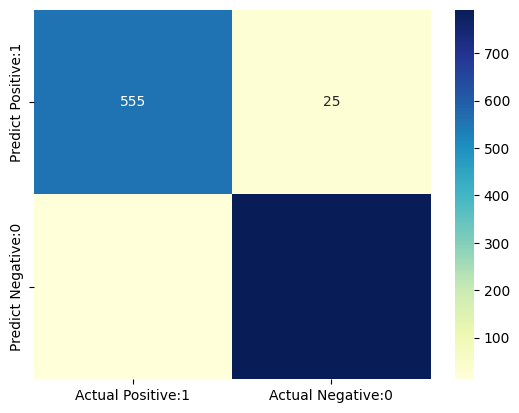

In [66]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [67]:
from sklearn.metrics import roc_curve
weighted_prediction = grid.predict(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, weighted_prediction, pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [68]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, weighted_prediction)


print(auc_score1)

0.9709855892949047


# Visualizing Using ROC Curves:

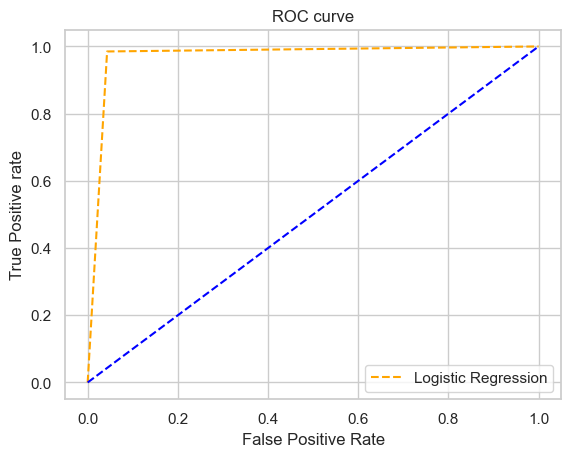

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set(style='whitegrid')

# Create ROC curve plot
sns.lineplot(x=fpr1, y=tpr1, linestyle='--', color='orange', label='Logistic Regression')
sns.lineplot(x=p_fpr, y=p_tpr, linestyle='--', color='blue')

# Title
plt.title('ROC curve')

# X label
plt.xlabel('False Positive Rate')

# Y label
plt.ylabel('True Positive rate')

# Show plot
plt.show()


# Prediction for Movie Reviews

In [70]:
 movie_review_list=['Bad movie, wouldnt recommend'] 
 movie_vector=vectorizer.transform(movie_review_list)
 pred = grid.predict(movie_vector)

In [71]:
pred

array([0], dtype=int64)

ROSHITA

In [72]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train,y_train)

SVC(probability=True)

In [73]:
model.score(X_test,y_test)

0.9739884393063584

In [75]:

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}  
grid_SVC = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid_SVC.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.955 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.962 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.969 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.982 total time=   0.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.982 total time=   0.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.567 total time=   1.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [76]:
weighted_prediction_SVC = grid_SVC.predict(X_test)

# Performance

In [77]:
print('Accuracy:', accuracy_score(y_test, weighted_prediction_SVC))
print('F1 score:', f1_score(y_test, weighted_prediction_SVC,average='weighted'))
print('Recall:', recall_score(y_test, weighted_prediction_SVC, average='weighted'))
print('Precision:', precision_score(y_test, weighted_prediction_SVC,average='weighted'))

Accuracy: 0.986271676300578
F1 score: 0.9862597549434926
Recall: 0.986271676300578
Precision: 0.9862997895392668


In [78]:
print ('Clasification report:\n', classification_report(y_test, weighted_prediction_SVC))

Clasification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       580
           1       0.98      0.99      0.99       804

    accuracy                           0.99      1384
   macro avg       0.99      0.99      0.99      1384
weighted avg       0.99      0.99      0.99      1384



In [79]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, weighted_prediction_SVC)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[567  13]
 [  6 798]]

True Positives(TP) =  567

True Negatives(TN) =  798

False Positives(FP) =  13

False Negatives(FN) =  6


# Visualizing Confusion

<Axes: >

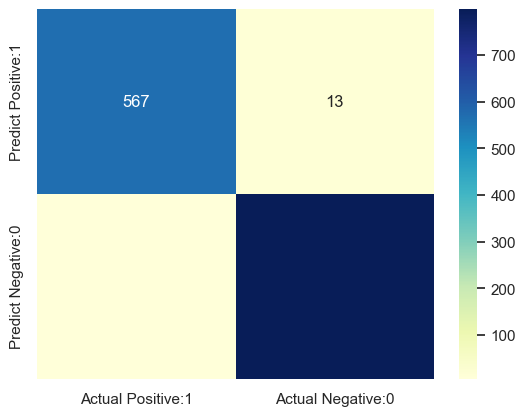

In [80]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# ROC Curve for Binary Classification And Visualizing Model Performance

In [81]:
from sklearn.metrics import roc_curve

weighted_prediction2 = model.predict(X_test)
fprSVC, tprSVC, thresh1 = roc_curve(y_test, weighted_prediction_SVC, pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [82]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, weighted_prediction_SVC)


print(auc_score1)

0.9850617601646937


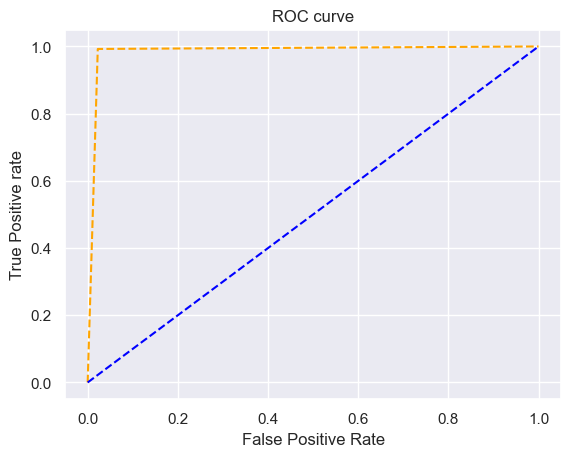

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set_style('darkgrid')

# plot roc curves
plt.plot(fprSVC, tprSVC, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# Title
plt.title('ROC curve')

# X label
plt.xlabel('False Positive Rate')

# Y label
plt.ylabel('True Positive rate')

# Show plot
plt.show()

# Prediction

In [84]:
 movie_review_list=['Bad movie, wouldnt recommend'] 
 movie_vector=vectorizer.transform(movie_review_list)
 pred = model.predict(movie_vector)

In [85]:
pred

array([0], dtype=int64)

AAYUSHI

# Comparing Model Accuracy

<BarContainer object of 2 artists>

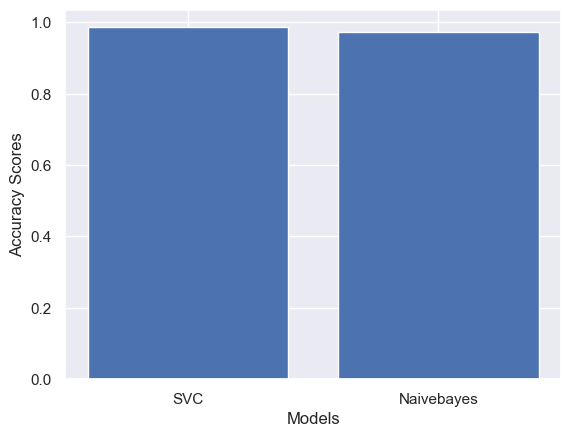

In [86]:
x=np.array(["SVC","Naivebayes"])
y=np.array([accuracy_score(y_test, weighted_prediction_SVC),accuracy_score(y_test, weighted_prediction)])
plt.xlabel("Models")
plt.ylabel("Accuracy Scores")
plt.bar(x,y)

In [87]:
MLA = [
    grid,
    grid_SVC,
    ]

In [88]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg
    MLA_compare.loc[row_index, 'Algorithm'] = MLA_name
    MLA_compare.loc[row_index, 'Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
  
MLA_compare

,Algorithm,Accuracy,Precision,Recall,AUC
0,"GridSearchCV(estimator=MultinomialNB(),\n ...",0.9733,0.96940,0.985075,0.970986
1,"GridSearchCV(estimator=SVC(),\n pa...",0.9863,0.98397,0.992537,0.985062


In [89]:
models = []

models.append(('NB', naive_bayes.MultinomialNB()))
models.append(('SVM', SVC()))

# Algorithm Performance Comparison

NB: 0.980847 (0.006865)
SVM: 0.979401 (0.006816)


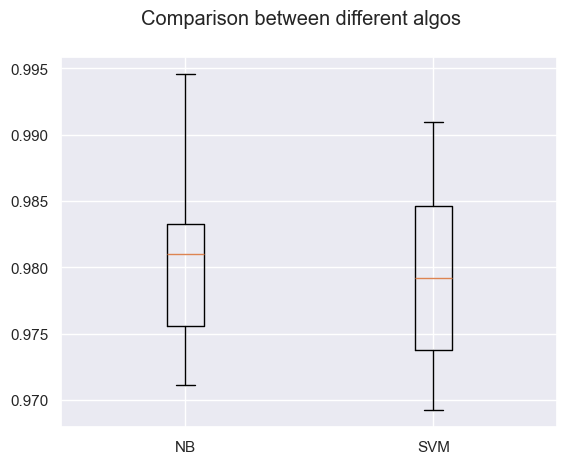

In [90]:
from sklearn import svm,model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different algos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

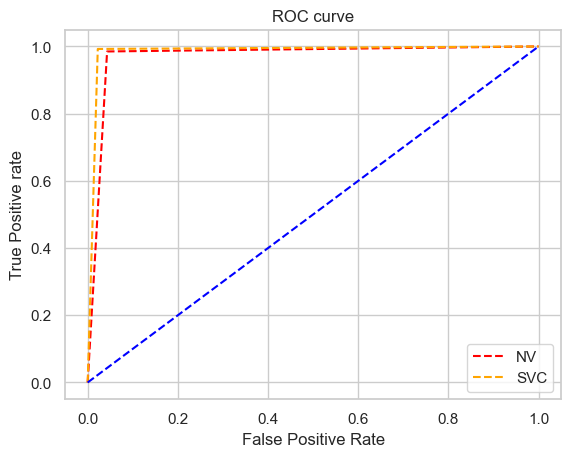

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set_style('whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--', color='red')
plt.plot(fprSVC, tprSVC, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# Title
plt.title('ROC curve')

# X label
plt.xlabel('False Positive Rate')

# Y label
plt.ylabel('True Positive rate')

# Add legend
plt.legend(['NV', 'SVC'])

# Show plot
plt.show()

ATHARVA

# recommend movie by user input

In [92]:
print("Enter a movie:", end=" ")
movie=input()

Enter a movie: Avatar


In [93]:
recommend(movie)

['Titan A.E.',
 'Small Soldiers',
 "Ender's Game",
 'Aliens vs Predator: Requiem',
 'Independence Day']

In [94]:
import requests

In [95]:
pip install IMDbPY

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Fetching IMDb

In [96]:
import imdb
ia = imdb.IMDb()
search = ia.search_movie(movie)
id = search[0].movieID

In [97]:
from bs4 import BeautifulSoup

In [98]:
page = requests.get('https://www.imdb.com/title/tt{}/reviews?ref_=tt_urv'.format(id))
soup = BeautifulSoup(page.content, 'html.parser')

In [99]:
print('https://www.imdb.com/title/tt{}/reviews?ref_=tt_urv'.format(id))

https://www.imdb.com/title/tt9018736/reviews?ref_=tt_urv


In [100]:
reviews=[]

In [101]:
movie_data=soup.find_all('div',attrs= {'class': 'lister-item-content'})


In [102]:
for store in movie_data:
    review = store.find('a', class_ = 'title').text.replace('\n', '')
    reviews.append(review)

In [103]:
reviews

[' Entertaining Enough',
 ' Very good work, but it is darkened by the legacy and weight of the series name',
 ' Lost Arc of Aang',
 ' I enjoyed it',
 ' Surprisingly good',
 ' I turned it off and watched the original cartoon instead.',
 ' This Series Is All Bark And No Bite',
 " No, it's not that good and don't even compare it to the Netflix One Piece",
 ' Never saw the animated series so I had no expectations',
 ' Amazing CGI and Effects, Bad acting and Script',
 ' I want more',
 ' Where is the humour?',
 ' I can see why the original writers left',
 ' Weak dialogue and rushed pacing compromise an otherwise well-done adaptation',
 ' Way better than the last movie, however some criticisms..',
 ' Excellent VFx but story and writing is lacking.',
 ' Good, Could Be Great With Tweaks',
 ' Beautiful visuals',
 ' Pretty Darn Good',
 ' Gorgeous effects, failure of characters',
 ' Great scenary, weird scripting/directing',
 ' Better than expected but parts of the wood they build is inconsistent'

# Sentiment Analysis Predictions for Movie Reviews

In [104]:
for i in reviews:
  movie_vector=vectorizer.transform([i])
  pred = grid_SVC.predict(movie_vector)
  print(i, pred)
   
#0- negative
#1- positive

 Entertaining Enough [1]
 Very good work, but it is darkened by the legacy and weight of the series name [1]
 Lost Arc of Aang [1]
 I enjoyed it [1]
 Surprisingly good [1]
 I turned it off and watched the original cartoon instead. [1]
 This Series Is All Bark And No Bite [1]
 No, it's not that good and don't even compare it to the Netflix One Piece [0]
 Never saw the animated series so I had no expectations [1]
 Amazing CGI and Effects, Bad acting and Script [1]
 I want more [1]
 Where is the humour? [1]
 I can see why the original writers left [0]
 Weak dialogue and rushed pacing compromise an otherwise well-done adaptation [1]
 Way better than the last movie, however some criticisms.. [0]
 Excellent VFx but story and writing is lacking. [1]
 Good, Could Be Great With Tweaks [1]
 Beautiful visuals [1]
 Pretty Darn Good [1]
 Gorgeous effects, failure of characters [1]
 Great scenary, weird scripting/directing [0]
 Better than expected but parts of the wood they build is inconsistent [0

In [105]:
# Import classifiers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
# Import Gaussian NB Classification models
from sklearn.naive_bayes import GaussianNB
# Import Logistic Regression Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import VotingClassifier

In [106]:
# Initialize classifiers
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
perceptron_clf = Perceptron()
svc_clf = SVC(probability=True, random_state=42)
knn_clf = KNeighborsClassifier()
logistic_clf = LogisticRegression(max_iter=1000, random_state=42)
GaussianNB_clf = GaussianNB()
ExtraTrees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
GradientBoostingClassifier_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
LinearDiscriminantAnalysis_clf = LinearDiscriminantAnalysis()
AdaBoostClassifier_clf = AdaBoostClassifier(random_state=42)

In [107]:
# Create a list of classifiers
classifiers = [
    ('Bagging', bagging_clf),
    ('Random Forest', rf_clf),
    ('Decision Tree', dt_clf),
    ('Perceptron', perceptron_clf),
    ('SVC', svc_clf),
    ('KNN', knn_clf),
    ('logistic Regression', logistic_clf),
    ('ExtraTreesClassifier', ExtraTrees_clf),
    ('GradientBoostingClassifier', GradientBoostingClassifier_clf),
    ('AdaBoostClassifier', AdaBoostClassifier_clf)
]

In [108]:
dicDataFrame={
    'Classifier Name':[],
    'Accuracy':[]
}
Maxaccuracy=20
ListMax_accuracy=[]
# Train and evaluate each classifier
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    dicDataFrame['Classifier Name'].append(clf_name)
    dicDataFrame['Accuracy'].append(accuracy)
    if accuracy > Maxaccuracy :
        Maxaccuracy=accuracy
        ListMax_accuracy=[(clf_name,clf)]
DataFrame=pd.DataFrame(dicDataFrame)
DataFrame.loc[-1]=[ListMax_accuracy[0],Maxaccuracy]
#display(DataFrame)
#print(f"Max accuracy :{Maxaccuracy} , classifier of max accuracy : {ListMax_accuracy}")
# Sort the DataFrame by accuracy in ascending order
DataFrame = DataFrame.sort_values(by='Accuracy')

In [109]:
DataFrame.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index([0,1,2,3,4,5,6,7,8,9,'Max Accuracy'], axis=0)

,CLASSIFIER NAME,ACCURACY
0,KNN,"96,749"
1,SVC,"97,399"
2,Bagging,"97,977"
3,Decision Tree,"97,977"
4,GradientBoostingClassifier,"98,266"
5,Perceptron,"98,410"
6,logistic Regression,"98,410"
7,ExtraTreesClassifier,"98,916"
8,Random Forest,"98,988"
9,AdaBoostClassifier,"99,061"


In [110]:
dicDataFrame_round2_2={
    'Classifier Name':[],
    'Accuracy':[]
}
Maxaccuracy_round2_2=Maxaccuracy
ListMax_accuracy_round2_2=ListMax_accuracy
for num in range(0,10):
    for i in range(num+1,10):
        list1=[classifiers[i],classifiers[num]]
        NameClassifier=classifiers[i][0]+' and '+classifiers[num][0]
        ensemble_classifier = VotingClassifier(estimators=list1)
        ensemble_classifier.fit(X_train, y_train)
        y_pred = ensemble_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)*100
        dicDataFrame_round2_2['Classifier Name'].append(NameClassifier)
        dicDataFrame_round2_2['Accuracy'].append(accuracy)
        if accuracy> Maxaccuracy_round2_2:
            Maxaccuracy_round2_2=accuracy
            ListMax_accuracy_round2_2=list1
DataFrame_round2_2=pd.DataFrame(dicDataFrame_round2_2)
print(DataFrame_round2_2['Classifier Name'].nunique())


DataFrame_round2_2.loc[-1]=[ ListMax_accuracy_round2_2,Maxaccuracy_round2_2]
#display(DataFrame_round2_2)

45


In [111]:

List67=list(range(0,45))
List67.append('Max Accuracy')
DataFrame_round2_2.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(List67, axis=0)

,CLASSIFIER NAME,ACCURACY
0,Random Forest and Bagging,"98,483"
1,Decision Tree and Bagging,"98,049"
2,Perceptron and Bagging,"98,049"
3,SVC and Bagging,"97,977"
4,KNN and Bagging,"97,543"
5,logistic Regression and Bagging,"98,266"
6,ExtraTreesClassifier and Bagging,"98,410"
7,GradientBoostingClassifier and Bagging,"97,977"
8,AdaBoostClassifier and Bagging,"98,483"
9,Decision Tree and Random Forest,"98,627"


In [112]:
dicDataFrame_round3_2={
    'Classifier Name':[],
    'Accuracy':[]
}
 
Maxaccuracy_round3_2=Maxaccuracy_round2_2
ListMax_accuracy_round3_2=ListMax_accuracy_round2_2

for i in range(0,10):
    for j in range(i+1,10):
        for x in range(j+1,10):
            if classifiers[i] not in [classifiers[j],classifiers[x]] and classifiers[j]!=classifiers[x] :
                list2=[classifiers[i],classifiers[j],classifiers[x]]
                NameClassifier=classifiers[i][0]+' and '+classifiers[j][0]+' and '+classifiers[x][0]
                ensemble_classifier = VotingClassifier(estimators=list2)
                ensemble_classifier.fit(X_train, y_train)
                y_pred = ensemble_classifier.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)*100
                dicDataFrame_round3_2['Classifier Name'].append(NameClassifier)
                dicDataFrame_round3_2['Accuracy'].append(accuracy)
                if accuracy> Maxaccuracy_round3_2:
                    Maxaccuracy_round3_2=accuracy
                    ListMax_accuracy_round3_2=list2
DataFrame_round3_2=pd.DataFrame(dicDataFrame_round3_2)
print(DataFrame_round3_2['Classifier Name'].nunique())
DataFrame_round3_2.loc[-1]=[ ListMax_accuracy_round3_2,Maxaccuracy_round3_2]
#display(DataFrame_round3_2)

120


In [113]:
List221=list(range(0,120))
List221.append('Max Accuracy')
DataFrame_round3_2.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(List221, axis=0)

,CLASSIFIER NAME,ACCURACY
0,Bagging and Random Forest and Decision Tree,"98,194"
1,Bagging and Random Forest and Perceptron,"98,916"
2,Bagging and Random Forest and SVC,"98,772"
3,Bagging and Random Forest and KNN,"98,699"
4,Bagging and Random Forest and logistic Regression,"98,844"
5,Bagging and Random Forest and ExtraTreesClassifier,"99,061"
6,Bagging and Random Forest and GradientBoostingClassifier,"98,772"
7,Bagging and Random Forest and AdaBoostClassifier,"98,916"
8,Bagging and Decision Tree and Perceptron,"98,121"
9,Bagging and Decision Tree and SVC,"98,121"


## Conclusion

This paper presents a comprehensive exploration into two major components: Movie Recommendation System and Sentiment Analysis. The Movie Recommendation System utilizes the Cosine Similarity algorithm to provide accurate movie suggestions based on various factors such as genre, overview, cast, and ratings. The algorithm demonstrates consistent and reliable results through multiple tests, affirming its effectiveness.

In the realm of sentiment analysis, two algorithms, Naïve Bayes (NB) and Support Vector Machine (SVM) Classifier, are employed to classify reviews as positive or negative. The goal is to identify the most suitable algorithm for diverse reviews. Experimental results reveal that SVM outperforms NB, albeit by a small margin, emphasizing its superiority in sentiment analysis.

The study identifies potential areas for future improvement, including enhancing the accuracy of sentiment analysis for classifying sarcastic or ironic reviews, extending sentiment analysis to languages beyond English, and refining movie recommendations based on users' preferences.

Despite the system's high accuracy, certain limitations exist. The system may falter when the user inputs a movie not present in the dataset or enters the name differently. Additionally, the linguistic barrier in sentiment analysis is acknowledged, as only English reviews are currently analyzed, and sarcasm or irony can lead to misclassification.
